# <font size=6>**Estatística com Python: resumindo e analisando dados**</font>

Estamos prestando consultoria como **cientistas de dados** em uma grande rede de varejo que atende em todo Brasil.

Aqui, precisaremos utilizar uma série de conceitos da estatística para investigar e auxiliar nos problemas e demandas que essa empresa está enfrentando, baseando suas decisões na análise dos dados recebidos.

Neste projeto, vamos ter acesso a duas bases de dados passando por dois contextos distintos dentro da empresa:
1. Análise do público e vendas, traçando o perfil da nossa clientela e gerando insights com esses dados respondendo a perguntas levantadas pelo setor de marketing e vendas
2. Análise da remuneração dos colaboradores, passando pelos salários, desempenho atual e analisando criticamente a equidade salarial entre cargos e gênero, por exemplo. Isto, respondendo a perguntas do setor do RH e financeiro da empresa.

**Base de dados**

Vamos importar duas bases de dados:

> Dados das vendas do e-commerce, separados pelo código identificador da compra.

> Dados da remuneração dos colaboradores da empresa, separados pelo código identificador do(a) colaborador(a).

Esses dados serão lidos a partir do repositório compartilhado pelo GitHub.

**Desafio**

Nosso desafio é aplicar os conceitos de **distribuições de frequência, medidas de tendência central, medidas separatizes e de dispersão e visualização de dados** para cada caso trazido por essa empresa para que possa agregar valor aos times e ajudar nos processos de decisão. Para isso, serão repassados alguns questionamentos ao longo do nosso projeto para que possamos contribuir na execução dessa demanda.

Vamos utilizar a **linguagem Python** para responder todos os questionamentos levantados.

# **1. Entendendo os dados**

---


## **1.1  Importando os pacotes e lendo os dados**

Como vamos explorar os dados das bases, gerar visualizações e responder a perguntas, vamos trazer um pacote extremamente importante e bastante utilizado por pessoas cientistas e pesquisadoras que é o `pandas`.

https://pandas.pydata.org/

In [1]:
import pandas as pd

Vamos ler a nossa primeira base de dados para as análises do perfil da nossa clientela de acordo com as compras que realizaram.

Vamos também salvar os dados em uma variável, para que possamos manipulá-los

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/Estatisticas-Python-frequencias-medidas/refs/heads/main/dados/vendas_ecommerce.csv'
df = pd.read_csv(url)
df.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5


Retornar a quantidade de linhas e colunas do dataset

In [3]:
df.shape

(200000, 10)

Verificar o nome de cada coluna, a quantidade de dados não nulos existente na coluna em questão e o tipo de dado.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_compra          200000 non-null  object 
 1   sexo_biologico     200000 non-null  object 
 2   idade_cliente      200000 non-null  int64  
 3   regiao_cliente     200000 non-null  object 
 4   categoria_produto  200000 non-null  object 
 5   preco_unitario     200000 non-null  float64
 6   quantidade         200000 non-null  int64  
 7   total_compra       200000 non-null  float64
 8   tempo_entrega      200000 non-null  int64  
 9   avaliacao          200000 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 15.3+ MB


Conseguimos observar aqui os dados das vendas da empresa com algumas colunas interessantes.

Podemos realizar talvez uma análise de vendas por região, por gênero, podemos explorar os tipos de produtos, o tempo de entrega e avaliação. Ou seja, bastante coisa!

Para todas essas análises que podemos traçar, temos 2 pontos extremamente importantes:

1. Qual o tipo de dado que tenho?
2. O que desejo investigar com este dado?

A estatística, é muito importante aqui, pois a depender do tipo do dado e como ele se comporta temos diferentes formas de analisá-lo para responder a necessidade do nosso cliente. Tudo isso focado no tripé da ciência de dados: **estatística**, **programação** e **conhecimento do negócio**

Vamos aplicar as 3 aqui apontando o seu potencial na análise de dados e extração de insights utilizando a linguagem Python.

Vamos nessa?

## **1.2 Investigando os tipos dos dados**

Observando rapidamente os dados, podemos notar dados em formato de textos, números inteiros, números com casas decimais. A depender da análise que queremos fazer, cada um tem uma forma de ser trabalhado e adequado para a extração de informação dos dados

In [5]:
df.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5


Ou seja, temos aqui dados categóricos (qualitativos) e numéricos (quantitativos).

### Tipos de Variáveis:

![texto do link](https://github.com/afonsosr2/estatistica-r-frequencias-medidas/blob/main/imagens/outros/tipos_variaveis.png?raw=true)

- **Qualitativas (Categóricas):** São variáveis que representam características ou categorias. Geralmente, são usadas para classificar ou categorizar dados. Por exemplo: sexo biólogico e região
  - **Nominais:** quando não possuem uma ordem natural. (Ex.: tipo de produto).  
  - **Ordinais:** Possuem uma ordem ou hierarquia. (Ex.: Níveis de escolaridade).

- **Quantitativas (Numéricas):** São variáveis que representam números e podem ser mensuradas. Estas variáveis têm significado matemático e podem ser usadas para cálculos. Por exemplo: idade e total de compra
  - **Discretas:** Valores inteiros e contáveis (Ex.: quantidade de produtos).  
  - **Contínuas:** Qualquer valor em um intervalo (Ex.: Altura de pessoas).

Podemos então realizar uma análise simples aqui, investigando uma **variável qualitativa nominal** como, por exemplo, a quantidade de vendas por categoria:

In [6]:
df['categoria_produto']

0              Ferramentas e Construção
1                   Alimentos e Bebidas
2                           Eletrônicos
3                           Eletrônicos
4                Papelaria e Escritório
                      ...              
199995                      Eletrônicos
199996                      Eletrônicos
199997    Roupas, Calçados e Acessórios
199998              Alimentos e Bebidas
199999       Beleza e Cuidados Pessoais
Name: categoria_produto, Length: 200000, dtype: object

In [7]:
df['categoria_produto'].unique()

array(['Ferramentas e Construção', 'Alimentos e Bebidas', 'Eletrônicos',
       'Papelaria e Escritório', 'Beleza e Cuidados Pessoais',
       'Casa e Mobílias', 'Roupas, Calçados e Acessórios', 'Livros',
       'Brinquedos', 'Esporte e Lazer'], dtype=object)

In [8]:
produtos = df['categoria_produto'].value_counts().reset_index()
produtos

,categoria_produto,count
0,Eletrônicos,36060
1,"Roupas, Calçados e Acessórios",27917
2,Casa e Mobílias,26015
3,Beleza e Cuidados Pessoais,22026
4,Esporte e Lazer,19939
5,Alimentos e Bebidas,18022
6,Papelaria e Escritório,13936
7,Livros,13790
8,Ferramentas e Construção,12063
9,Brinquedos,10232


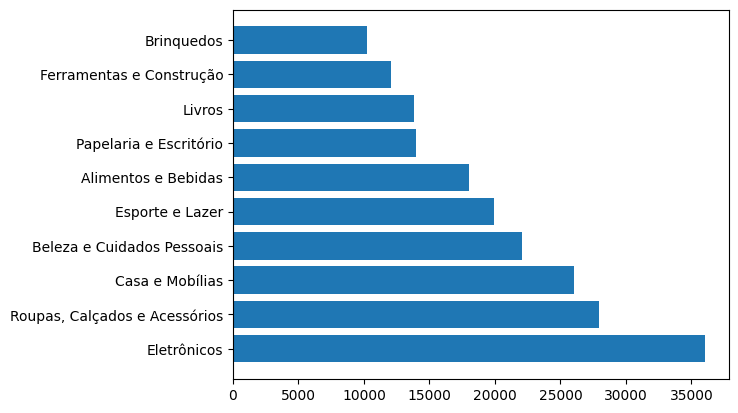

In [9]:
import matplotlib.pyplot as plt
plt.barh(produtos['categoria_produto'], produtos['count'])
plt.show()

Olha só! Apenas analisando uma única coluna já podemos extrair uma informação bem relevante sobre os registros de venda por categoria.

Vamos na sequência analisar e aprender como utilizar uma **variável qualitativa ordinal** deixando-a preparada em nossa base.

## **1.3 Manipulando dados qualitativos ordinais**

---

A gente já observou anteriormente os diferentes tipos de variáveis e começamos a entender como analisar os dados categóricos de uma base.

Uma variável bem interessante em nossa base é a `avaliacao` do produto. Mesmo com dados numéricos, pode ser interpretada como uma variável qualitativa, pois as notas representam uma ordem relacionada a satisfação do cliente. Partindo do Péssimo (nota 1) ao Ótimo (nota 5).

In [10]:
sorted(df['avaliacao'].unique())

[1, 2, 3, 4, 5]

In [11]:
df['avaliacao indicador'] = pd.Categorical(
    df['avaliacao'],
    categories=[1, 2, 3, 4, 5],
    ordered=True
  )

In [12]:
avaliacao_labels = {1: 'Péssimo', 2: 'Ruim', 3: 'Regular', 4: 'Bom', 5: 'Ótimo'}
df['avaliacao indicador'] = df['avaliacao indicador'].map(avaliacao_labels)

In [13]:
df.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1,Péssimo
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4,Bom
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5,Ótimo
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5,Ótimo
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5,Ótimo


In [14]:
df_unico = df[['avaliacao', 'avaliacao indicador']].drop_duplicates()
df_unico

,avaliacao,avaliacao indicador
0,1,Péssimo
1,4,Bom
2,5,Ótimo
8,3,Regular
14,2,Ruim


Passando por alguns exemplos de variáveis qualitativas em nosso dado. Mas que tal analisarmos também os diferentes dados numéricos?

## **1.4 Diferenciando dados discretos de contínuos**

---

Temos alguns dados numéricos em nossa base de dados. Mas cada variável  tem a sua forma de ser analisada. Algumas delas até com possibilidades de serem encaixadas em 2 ou mais subdivisões.

In [15]:
df['quantidade'].unique()

array([ 2,  1,  8,  5,  3,  7,  6,  4, 10,  9], dtype=int64)

In [16]:
print(f"Vendemos de {min(df['quantidade'])} até {max(df['quantidade'])} unidades de produto por registro")

Vendemos de 1 até 10 unidades de produto por registro


In [17]:
df['total_compra'].unique()

array([  193.6 ,   247.68,  1254.92, ..., 13183.8 ,  1666.33,  1193.03])

In [18]:
print(f"Tivemos vendas a partir de R$ {min(df['total_compra']):,.2f} até R$ {max(df['total_compra']):,.2f}")

Tivemos vendas a partir de R$ 5.05 até R$ 20,744.70


In [19]:
df.sort_values(by='total_compra')

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
157075,b866504d-9fe1-4c75-8956-decf7f25dd75,Masculino,35,Sudeste,Papelaria e Escritório,5.05,1,5.05,13,4,Bom
4562,5a66b58a-2ab0-49c3-b597-f45846130ded,Feminino,37,Norte,Papelaria e Escritório,5.14,1,5.14,11,2,Ruim
6279,c67e996c-403c-4f58-81c5-996c1ab676a5,Masculino,34,Sul,Papelaria e Escritório,5.28,1,5.28,7,3,Regular
50155,e7ad75b4-6a0e-4609-801c-ef12adeb837a,Masculino,55,Sudeste,Papelaria e Escritório,5.35,1,5.35,11,5,Ótimo
85703,ed88c6a2-2fdd-4278-bfa8-fd54f7e2f357,Feminino,42,Centro-Oeste,Papelaria e Escritório,5.78,1,5.78,16,4,Bom
...,...,...,...,...,...,...,...,...,...,...,...
88073,5f125e88-f01c-4499-9a25-c4910bc76dee,Masculino,39,Nordeste,Eletrônicos,2037.44,10,20374.40,7,2,Ruim
134287,2c3853dc-b9dc-400a-bd70-ff2521fe4d8a,Feminino,35,Sul,Eletrônicos,2057.76,10,20577.60,6,2,Ruim
17790,dbf2429a-3252-42df-ad4e-a11339afceb8,Feminino,33,Sudeste,Eletrônicos,2058.18,10,20581.80,4,5,Ótimo
114561,dc3c4162-5772-480e-b7fa-0ccc41d78a40,Feminino,29,Sudeste,Eletrônicos,2058.77,10,20587.70,6,5,Ótimo


Agora que já entendemos a importância de como trabalhar e analisar diferentes tipos de dados, estamos prontos(as) para responder às perguntas levantadas pelas lideranças da empresa trazendo informações relevantes para o que desejam.

# **2. Identificando o perfil do público**

---

Agora, vamos partir para as análises acerca do perfil do público, como requisitado pelo time de marketing e vendas da empresa varejista que estamos estudando.

Para isso, vamos utilizar uma ferramenta estatística muito importante, que organiza e resume dados em grupos ou classes: a distribuição de frequência. Com ela iremos analisar de maneira mais direta e eficiente as informações dos clientes com os dados qualitativos que possuímos.

Mas, antes disso, vamos interpretar as perguntas que devemos responder e como este tipo de distribuição poderá nos ajudar.

## **2.1 Distribuindo frequências de dados qualitativos - 1 variável**

---

### <font color="#E23155" face="Verdana">Demanda 1: Acompanhamento das avaliações dos clientes</font>

A empresa quer acompanhar as **avaliações dos clientes** sobre seus produtos a fim de priorizar ações, como melhorar produtos com maior proporção de feedbacks negativos, investigar causas e explorar pontos fortes apontados pelos clientes satisfeitos. Essas avaliações variam entre:

1. **Péssimo**
2. **Ruim**
3. **Regular**
4. **Bom**
5. **Ótimo**

Como a **equipe de marketing e vendas** poderá investigar a percepção geral dos clientes sobre os produtos e identificar possíveis comportamentos para ajustar suas estratégias de comunicação e melhoria de produtos?

### <font color="#E23155" face="Verdana">Solução:</font>

### **Distribuição de frequência**

A **distribuição de frequência** é uma tabela que contêm os dados de acordo com a sua **frequência** ($f_i$ = quantidade de vezes que uma determinada variável ocorre). Ela é utilizada tanto para dados **qualitativos** quanto **quantitativos**.

Cada entrada na tabela contém a contagem de ocorrências de valores dentro de um grupo ou intervalo específico, resumindo a distribuição destes valores. Por exemplo, classifica a quantidade de pessoas pelo sexo biológico, a quantidade de itens de um produto vendido, a faixa de renda de pessoas, etc.

#### **Frequência absoluta ($f_i$)**

É o número de vezes em que uma dada observação aparece numa variável. Para cada valor possível, você tem uma dada frequência, cuja soma seria igual a frequência total absoluta, ou melhor, o número total de registros.

# $$F = \sum_{i=1}^{n}f_i = f_1 + f_2 + ... + f_n$$

&nbsp;

#### **Como construir:**

1.  Ordenar os valores das variáveis em ordem crescente ou decrescente;

2.  Determinar a frequência de cada valor;

3.  Agrupar os dados em classes ou intervalos

As avaliações são armazenadas em uma variável chamada `avaliacao_indicador` dentro do banco de dados da empresa.

In [20]:
df.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1,Péssimo
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4,Bom
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5,Ótimo
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5,Ótimo
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5,Ótimo


In [21]:
freq_avaliacoes = (df.groupby('avaliacao indicador', observed=False)
                   .size()
                   .reset_index(name='freq_absoluta')
                   .sort_values(by='avaliacao indicador', ascending=False))

freq_avaliacoes

,avaliacao indicador,freq_absoluta
4,Ótimo,66076
3,Bom,40980
2,Regular,32282
1,Ruim,28239
0,Péssimo,32423


#### **Frequência relativa ($f_{ri}$)**

Ela é dada pela razão entre a frequência absoluta de cada classe e a frequência total ou soma das frequências absolutas:

# $$f_{ri} = \frac{f_i}{F}$$

Para valores percentuais, basta multiplicar cada frequência relativa por 100.

In [22]:
freq_avaliacoes['freq_relativa'] = round((freq_avaliacoes['freq_absoluta'] / freq_avaliacoes['freq_absoluta'].sum()) * 100, 1)

In [23]:
freq_avaliacoes

,avaliacao indicador,freq_absoluta,freq_relativa
4,Ótimo,66076,33.0
3,Bom,40980,20.5
2,Regular,32282,16.1
1,Ruim,28239,14.1
0,Péssimo,32423,16.2


In [24]:
freq_avaliacoes.columns = ['Avaliação', 'Quantidade', 'Porcentagem (%)']

In [25]:
freq_avaliacoes

,Avaliação,Quantidade,Porcentagem (%)
4,Ótimo,66076,33.0
3,Bom,40980,20.5
2,Regular,32282,16.1
1,Ruim,28239,14.1
0,Péssimo,32423,16.2


In [26]:
import seaborn as sns

C:\Users\jef\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


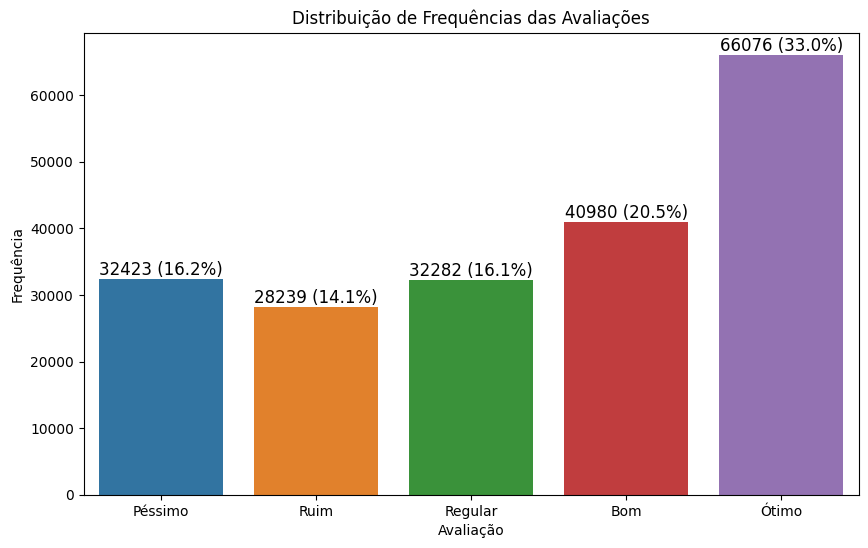

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(data=freq_avaliacoes, x='Avaliação', y='Quantidade')

# Adicionando título e rótulos aos eixos
plt.title("Distribuição de Frequências das Avaliações")
plt.xlabel("Avaliação")
plt.ylabel("Frequência")


# Adicionando os rótulos com valores de frequência e porcentagem
for index, row in freq_avaliacoes.iterrows():
    plt.text(index, row['Quantidade'] + 0.1, f"{row['Quantidade']} ({row['Porcentagem (%)']:.1f}%)",
             ha='center', va='bottom', fontsize=12)


plt.show()


Conseguimos perceber que de modo geral possuímos mais avaliações positivas ("Ótimo" e "Bom") que negativas ("Péssimo" e "Ruim"), porém o número de avaliações "Péssimo" está acima das avaliações neutras.

Reportar esse comportamento pode ser importante, pois a equipe de marketing poderá investigar com mais detalhes o que levou a esse nível de avaliação negativa.

## **2.2 Distribuindo frequências de dados qualitativos - 2 variáveis**

---


### <font color="#E23155" face="Verdana">Demanda 2: Avaliações dos clientes por região</font>

A equipe de marketing e vendas da empresa trouxe uma nova demanda para a análise das avaliações. Além de entender o comportamento geral das avaliações (avaliacao_indicador), agora desejam saber também como essas avaliações variam de acordo com a região do país.

Com isso, gostariam de identificar como as percepções dos clientes variam regionalmente, respondendo questões como:

* Qual região tem mais avaliações positivas?
* Alguma região concentra a maior parte das avaliações negativas?
* Existe alguma diferença relevante que indique a necessidade de ações específicas para uma região?

### <font color="#E23155" face="Verdana">Solução:</font>

### **Tabela de contingência (distribuição de frequência bivariada)**

A **tabela de contingência**, também conhecida como tabela cruzada ou tabela bidirecional, tem como objetivo representar de forma resumida a relação entre diferentes variáveis categóricas. Ela é uma espécie de **distribuição de frequência entre 2 variáveis** que analisa a relação entre as variáveis qualitativas, sejam elas dependentes ou independentes.

Geralmente, ela é construída com base em dados qualitativos, os quais são divididos em grupos mutuamente exclusivos. Por exemplo: quantidade de pessoas por sexo biológico e grau de instrução.

Uma das principais utilizações de uma tabela de contingência é analisar a relação entre dados que não são facilmente identificáveis.

In [28]:
tab_avaliacoes_regiao = pd.crosstab(df['avaliacao indicador'], df['regiao_cliente'])

In [29]:
tab_avaliacoes_regiao

regiao_cliente,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
avaliacao indicador,,,,,
Péssimo,5005,7880,2757,9838,6943
Ruim,4473,6809,2545,8810,5602
Regular,3587,5701,3811,13454,5729
Bom,7378,11834,3058,11845,6865
Ótimo,11124,17343,5490,20656,11463


#### **Quais as vantagens de uma tabela de contigência**

1. **Visualização das informações:** Organiza dados categóricos num formato compacto e legível, que podem ser transformadas em gráficos;

2. **Análises rápidas:** correlaciona variáveis de forma rápida e visual auxiliando na tomada de decisões informadas e com agilidade;

3. **Testes estatísticos:** Serve como base para realizar testes estatísticos a fim de avaliar a independência entre variáveis categóricas.

In [30]:
tab_avaliacoes_regiao_relativa = pd.crosstab(df['avaliacao indicador'], df['regiao_cliente'], normalize = 'columns') * 100

tab_avaliacoes_regiao_relativa = round(tab_avaliacoes_regiao_relativa, 1)

tab_avaliacoes_regiao_relativa

regiao_cliente,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
avaliacao indicador,,,,,
Péssimo,15.9,15.9,15.6,15.2,19.0
Ruim,14.2,13.7,14.4,13.6,15.3
Regular,11.4,11.5,21.6,20.8,15.7
Bom,23.4,23.9,17.3,18.3,18.8
Ótimo,35.2,35.0,31.1,32.0,31.3


#### ***Qual região tem mais avaliações positivas?***

Considerando "Ótimo" e "Bom" as Regiões Centro-Oeste e Nordeste dividem o ranking de avaliações mais positivas com mais de 55% de satisfação com as compras

In [31]:
tab_avaliacoes_filtrada = tab_avaliacoes_regiao_relativa[tab_avaliacoes_regiao_relativa.index.isin(['Ótimo', 'Bom'])]

resultado = tab_avaliacoes_filtrada.sum()
resultado


regiao_cliente
Centro-Oeste    58.6
Nordeste        58.9
Norte           48.4
Sudeste         50.3
Sul             50.1
dtype: float64

#### ***Alguma região concentra a maior parte das avaliações negativas?***

Analisando a tabela de valores absolutos conseguimos notar que a Região Sul tem a maior porcentagem de avaliações negativas (34.3%), sendo a única com quase 20% das notas no nível de satisfação "Péssimo".

In [32]:
tab_avaliacoes_filtrada = tab_avaliacoes_regiao_relativa[tab_avaliacoes_regiao_relativa.index.isin(['Ruim', 'Péssimo'])]

resultado = tab_avaliacoes_filtrada.sum()

resultado

regiao_cliente
Centro-Oeste    30.1
Nordeste        29.6
Norte           30.0
Sudeste         28.8
Sul             34.3
dtype: float64

#### ***Existe alguma diferença relevante que indique a necessidade de ações específicas para uma região?***

Sim! Como vimos anteriormente é necessário investigar a baixa avaliação na Região Sul comparada às outras regiões. Outro ponto de atenção está também nas Regiões Sudeste e Norte que concentram cada uma mais de 20% de notas "Regular".

Seriam pontos interessantes de reportar as partes interessadas!

## **2.3 Cruzando os dados dos clientes**

---


### <font color="#E23155" face="Verdana">Demanda 3: Perfil dos clientes</font>

A equipe de marketing e vendas da empresa trouxe mais uma demanda, desta vez, visando traçar o **perfil dos clientes** para melhorar suas campanhas publicitárias. Ela quer entender como o **ticket médio** varia entre o **sexo biológico** e a **região** onde a clientela reside. Com base nessa análise, será possível identificar oportunidades para segmentação de mercado e personalização de campanhas.

Não existe ainda uma análise cruzada dessas informações, portanto, a equipe precisa de uma tabela ou visual que resuma o **ticket médio por sexo e região** para extrair insights sobre o comportamento de consumo.

### <font color="#E23155" face="Verdana">Solução:</font>

A gente já aprendeu a criar uma distribuição de frequência cruzando duas variáveis diferentes. Para este problema precisamos adicionar a estatística descritiva de uma variável quantitativa, no caso a média, dentro dessa nova tabela.

Temos o total de cada compra dentro do nosso dataset. Precisamos então calcular o ticket médio das pessoas por sexo e região para encontrar, por exemplo, a média de compras de uma pessoa do sexo masculino da região Sudeste ou uma pessoa do sexo feminino da região Norte. Bem interessante, não é?

In [33]:
ticket_medio = round(pd.crosstab(df['sexo_biologico'], df['regiao_cliente'], values=df['total_compra'], aggfunc='mean'), 2)

ticket_medio

regiao_cliente,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
sexo_biologico,,,,,
Feminino,1887.12,1861.09,1828.61,2160.82,2176.44
Masculino,2025.24,2005.31,1830.54,1881.08,1871.38


Observando a matriz, percebemos que as pessoas de sexo biológico masculino possuem um ticket médio acima do feminino nas regiões Centro-Oeste e Nordeste, com uma diferença próxima de **R\$150,00**. Em contrapartida, as pessoas de sexo biológico feminino gastam mais do que o masculino nas regiões Sul e Sudeste, com uma diferença por volta de **R\$300,00** reais.

A análise de ticket médio aqui nos ajudou a entender o comportamento de consumo de diferentes segmentos de clientes.

# **3. Analisando a tendência dos dados**

---


## **3.1 Calculando a média de uma variável**

---


### <font color="#E23155" face="Verdana">Demanda 4: Tempo de entrega por tipo de produto</font>

A equipe de marketing e vendas está buscando formas de melhorar a experiência do cliente, e percebeu que o **tempo de entrega** é um fator crítico para aumentar a satisfação.

Por exemplo, produtos de categorias diferentes, como eletrônicos e roupas, podem ter tempos de entrega distintos devido a fatores como peso, localização dos fornecedores e demanda.

Por isso, precisamos calcular o **tempo médio de entrega para cada categoria de produto** com base nos dados históricos, visando fornecer estimativas mais precisas no site e permitir ajustes na logística.

### **Medidas de Tendência Central**

As **medidas de tendência central** são ferramentas estatísticas que ajudam a descrever as características dos dados resumindo-os em um único valor. Essas medidas (média, mediana e moda) são utilizadas em diversas análises e técnicas visando extrair informações dos dados.

### **Média aritmética ($\mu$)**

A **média aritmética**  é uma das mais conhecidas medidas de resumo. Ela é a soma de todos os valores divididos pelo número de observações. Representa um ponto central dos dados, ou seja, um ponto de equilíbrio.


# $$\mu = \frac 1n\sum_{i=1}^{n}X_i = \frac{X_1 + X_2 + ... + X_n}{n}$$

Onde:

$n$ = número de observações (registros)

$X_i$ = valor da i-ésima observação (registro)

### <font color="#E23155" face="Verdana">Solução:</font>

In [34]:
df.tempo_entrega.mean()

10.043535

In [35]:
media_entrega = df.tempo_entrega.mean()
media_entrega

10.043535

#### ***A média é sempre a melhor forma de resumir os dados***

A resposta é **não**! Por ser um ponto de equilíbrio, em algumas análises ela pode não ser a forma mais correta de indicar a tendência central.

Isto porque ela é muito influenciada pelos extremos da distribuição. Entretanto, com outras informações aliadas à média podemos tirar boas conclusões e investigar se precisamos ou não de algum tratamento e/ou transformação do dado.

In [36]:
media_entrega_cat = df.groupby('categoria_produto')['tempo_entrega'].mean().reset_index().round(1)
media_entrega_cat

,categoria_produto,tempo_entrega
0,Alimentos e Bebidas,7.7
1,Beleza e Cuidados Pessoais,8.9
2,Brinquedos,10.1
3,Casa e Mobílias,14.4
4,Eletrônicos,7.2
5,Esporte e Lazer,10.7
6,Ferramentas e Construção,13.6
7,Livros,9.5
8,Papelaria e Escritório,12.0
9,"Roupas, Calçados e Acessórios",9.2


In [37]:
media_entrega_cat.columns = ['categoria_produto', 'media_tempo']
media_entrega_cat = media_entrega_cat.sort_values(by='media_tempo', ascending=False)
media_entrega_cat

,categoria_produto,media_tempo
3,Casa e Mobílias,14.4
6,Ferramentas e Construção,13.6
8,Papelaria e Escritório,12.0
5,Esporte e Lazer,10.7
2,Brinquedos,10.1
7,Livros,9.5
9,"Roupas, Calçados e Acessórios",9.2
1,Beleza e Cuidados Pessoais,8.9
0,Alimentos e Bebidas,7.7
4,Eletrônicos,7.2


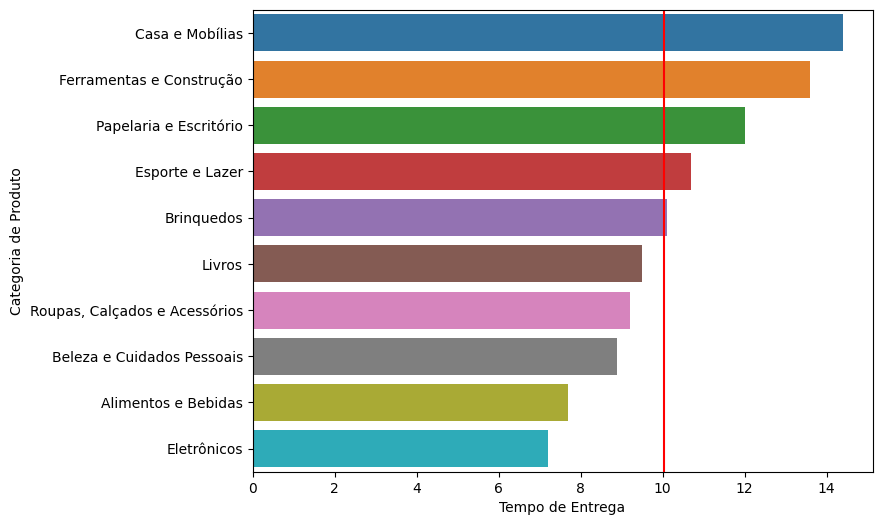

In [38]:
# Criando o gráfico de barras com seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=media_entrega_cat, x='media_tempo', y='categoria_produto')
plt.axvline(media_entrega, color='red')


plt.xlabel('Tempo de Entrega')
plt.ylabel('Categoria de Produto')


plt.show()


Como a empresa não possuia informações precisas sobre como os tempos de entrega variam entre as categorias de produtos, isso dificultava a definição de estimativas para os clientes, gerando frustrações quando o tempo real de entrega não corresponde ao esperado.

Aqui conseguimos apontar os gargalos e quais as categorias que precisam de atenção, seja pela dificuldade de transporte ou outros problemas.

## **3.2 Aplicando a mediana na investigação dos dados**

---

### <font color="#E23155" face="Verdana">Demanda 5: Vendas de eletrônicos na região Nordeste</font>

Para nossa nova demanda, a divisão da equipe de marketing e vendas que cuida das vendas no Nordeste está buscando investigar o comportamento dos consumidores nessa área, devido ao crescimento significativo nas vendas de **Eletrônicos**. A equipe deseja entender melhor a distribuição dos valores de vendas para ajustar sua estratégia de preços e campanhas.

Embora a média das vendas de eletrônicos forneça uma visão geral, ela pode ser influenciada por valores extremos, como compras muito altas ou muito baixas.

Para capturar um retrato mais representativo do comportamento típico dos consumidores qual medida podemos utilizar?

### **Mediana ($M_d$)**

A **mediana** representa o valor central de um conjunto de dados, passando o número que divide um conjunto de dados exatamente ao meio. Para obtermos a mediana de uma conjunto de dados devemos proceder da seguinte maneira:

1. Ordenar o conjunto de dados;
2. Identificar o número de observações (registros) do conjunto de dados ($n$);
3. Identificar o elemento mediano:

$$ Elemento_{Md} = \left\{\begin{matrix}
\frac{n+1}2 & ,se \ n \ for \ ímpar \\
 &  \\
\frac{n}2 & ,se \ n \ for \ par \\
\end{matrix}\right.$$

&nbsp;

4. Obter a mediana:

$$ M_d = \left\{\begin{matrix}
X_{Elemento_{Md}} & ,se \ n \ for \ ímpar \\
 &  \\
\frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2 & ,se \ n \ for \ par \\
\end{matrix}\right.$$

&nbsp;

### <font color="#E23155" face="Verdana">Solução:</font>

##### **Usando a fórmula**

In [39]:
dados_nordeste = df[(df['regiao_cliente'] == 'Nordeste') & (df['categoria_produto'] == 'Eletrônicos')]
dados_nordeste = dados_nordeste.sort_values('total_compra')
dados_nordeste.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
78891,b398ddb6-2790-443a-9d32-15ff5778ca19,Feminino,25,Nordeste,Eletrônicos,25.35,1,25.35,9,3,Regular
36398,76f5e991-cf96-4b4c-b6f5-4f84e763fdb9,Feminino,26,Nordeste,Eletrônicos,26.34,1,26.34,9,3,Regular
71461,689e13d1-85f7-44ac-997f-e46ed8c1fdde,Feminino,34,Nordeste,Eletrônicos,29.85,1,29.85,7,5,Ótimo
112356,b2878a8d-e3cc-40af-a46c-d9ae1b8e3aa6,Feminino,27,Nordeste,Eletrônicos,30.09,1,30.09,4,5,Ótimo
29317,23e748d7-2f72-4c3c-97ce-ac9fc5624ea8,Feminino,39,Nordeste,Eletrônicos,32.92,1,32.92,6,2,Ruim


In [40]:
n = len(dados_nordeste)
n

8872

In [41]:
elemento_md = int(n / 2)
elemento_md

4436

In [42]:
# Calculando a média entre o valor no índice 'elemento_md' e o próximo valor
round((dados_nordeste['total_compra'].iloc[elemento_md - 1] + dados_nordeste['total_compra'].iloc[elemento_md]) / 2,2)

2989.62

##### **Usando a função `median()`**

In [43]:
dados_nordeste.total_compra.median()

2989.62

In [44]:
dados_nordeste.total_compra.mean( )

3969.225537646528

#### ***Por que usar a mediana ao invés da média neste caso?***

Porque a **média** pode ser influenciada por valores extremos, enquanto a **mediana** reflete o ponto central das vendas, oferecendo uma medida de tendência central mais adequada em casos de dados assimétricos.

A mediana indica aqui que metade dos clientes gasta até, aproximadamente, R\$ 2.990,00 em eletrônicos, enquanto a média (R$ 3.970,00) sugere que há vendas bastante altas puxando o valor médio para cima.

---



##### **Visualizando diferença graficamente**

Para visualizar essa discrepância entre os dados, vamos criar um gráfico chamado **histograma**. Ele é uma espécie de gráfico de barras que demonstra uma distribuição de frequências.

No histograma, a base de cada uma das barras representa uma classe e a altura representa a quantidade ou frequência absoluta com que o valor de cada classe ocorre.

C:\Users\jef\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


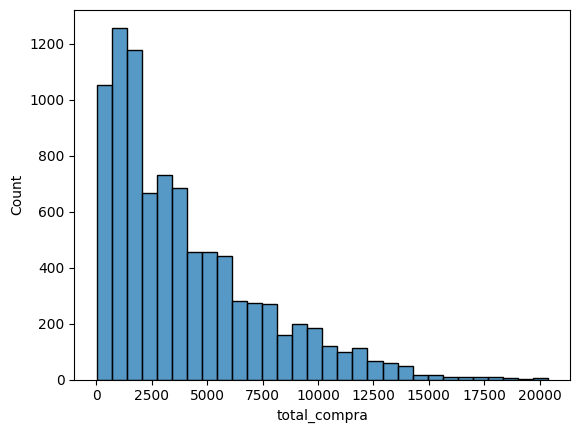

In [45]:
sns.histplot(dados_nordeste.total_compra, bins=30)
plt.show()

Como os dados de vendas de eletrônicos tiveram valores muito altos, o que elevou a média para **uma diferença de quase R$1.000,00** em relação à mediana, a mediana oferece uma métrica mais confiável para entender o comportamento típico do consumidor.

Neste caso, a mediana seria o ideal para reportar ao time de vendas como valor esperado de compra das pessoas clientes da empresa na Região Nordeste para produtos eletrônicos.

Essa informação pode auxiliar em estratégias de vendas como, por exemplo:

1. Criar promoções em produtos na faixa da mediana para atrair mais consumidores "típicos".
2. Destacar os produtos de alto valor nas campanhas de marketing para atingir clientes dispostos a gastar mais.

Como desafio, que tal você analisar também as medianas para os diferentes sexos biológicos?

## **3.3 Identificando os valores mais frequentes**

---



### <font color="#E23155" face="Verdana">Demanda 6: Campanha promocional de livros</font>

A equipe de marketing e vendas da empresa em que estamos prestando consultoria, está planejando uma nova campanha promocional de "Pague X e Leve Y Livros". Para definir a quantidade de livros a ofertar no pacote, eles decidiram basear-se na quantidade de livros mais frequentemente comprada pelos clientes. Isso permite criar uma promoção direcionada ao comportamento mais comum dos consumidores.

Precisamos então identificar qual ou quais quantidades de livro são mais frequentes para a campanha, maximizando a relevância e atratividade da promoção.


### **Moda ($M_o$)**

A **moda** representa o valor mais frequente de um conjunto de dados. Para obtermos a moda, basta observar a frequência com que os valores aparecem no conjunto de dados.

Esta medida é bastante utilizada para dados qualitativos, mas também tem aplicações em dados numéricos como em nosso exemplo.

### <font color="#E23155" face="Verdana">Solução:</font>

In [46]:
df['regiao_cliente'].value_counts()

regiao_cliente
Sudeste         64603
Nordeste        49567
Sul             36602
Centro-Oeste    31567
Norte           17661
Name: count, dtype: int64

Existem $n$ formas de encontrar a moda de uma variável. Em dados qualitativos, podemos contar, por exemplo, as ocorrências e pegar a que mais se repete. Já fizemos isso por meio das distribuições de frequência para uma variável.

In [47]:
dados_filtrados = df[df['categoria_produto'] == 'Livros']
dados_filtrados.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
11,b0494b41-df5b-488f-b305-43dda2916737,Feminino,24,Centro-Oeste,Livros,300.07,2,600.14,10,4,Bom
60,7c1da24d-871d-4a84-a21b-b25ad422676a,Masculino,44,Sudeste,Livros,177.15,2,354.30,11,1,Péssimo
61,7dd0a745-207a-41bc-a3bf-c5ff6e1cd274,Masculino,47,Sudeste,Livros,354.72,1,354.72,9,3,Regular
83,fa44d7e6-e17b-4fef-8326-e9b3035699e5,Masculino,35,Sul,Livros,116.94,3,350.82,16,3,Regular
92,399a3765-c43e-434f-b9eb-8cb7eb4a21ff,Feminino,26,Sul,Livros,129.11,4,516.44,10,4,Bom


#### ***Quais cuidados devemos ter com a moda?***

Por ser o valor mais frequente em um conjunto de dados, em dados numéricos é possível que haja repetições e, por isso, teremos mais de 1 moda (multimodalidade).

É importante decidir como lidar com esses casos para atingir o comportamento desejado.


In [48]:
moda = dados_filtrados.quantidade.mode()
moda

0    2
1    4
Name: quantidade, dtype: int64

Conseguimos observar aqui que temos **2 modas** na quantidade de livros vendidos (**bimodal**) e, portanto, podemos reportar esse resultado ficando a cargo da empresa qual campanha realizar.

Será que vale a pena para menos livros ou para mais livros? Ou seria melhor 2 campanhas como "Pague 2 e Leve 3" e "Pague 4 e leve 6", verificando qual converte mais clientes e gera mais vendas?

## **3.4 Compreendendo a relação entre média, mediana e moda**

---


### <font color="#E23155" face="Verdana">Demanda 7: Investigando as avaliações e sua relação com o tempo de entrega</font>

A equipe de marketing e vendas da empresa recebeu feedbacks de clientes sobre o tempo de entrega. Eles notaram que avaliações "Ótima" (nota 5) podem ter certa  relação com o tempo de entrega.

A hipótese é que clientes mais satisfeitos (nota 5) tendem a ter um tempo de entrega mais curto, mas isso só pode ser confirmado analisando os dados.
Com isso, queremos explorar:
* As distribuições do tempo de entrega e o que as medidas de tendência central podem nos informar.
* Se o comportamento das avaliações nota 5 realmente indica que entregas mais rápidas são mais apreciadas pelos clientes.


### <font color="#E23155" face="Verdana">Solução:</font>

Faremos uma análise em duas etapas:

1. **Distribuição do tempo de entrega:** calcularemos média, mediana e moda e visualizaremos a curva de densidade.
2. **Distribuição para avaliações nota 5:** repetiremos o processo para o caso, comparando os resultados com a distribuição geral.

### Relação entre média, mediana e moda:

Investigar a relação entre as medidas de tendência central pode ser bastante útil para identificar se uma variável é simétrica ou assimétrica, se precisa de algum tipo de transformação ou se é uma forte candidata a ter "outliers".

Abaixo, temos 3 tipos de comportamentos e como as estatísticas se posicionam em cada uma delas:

![texto do link](https://github.com/afonsosr2/estatistica-r-frequencias-medidas/blob/main/imagens/outros/relacao_media_mediana_moda.png?raw=true)


Vamos começar com a distribuição do tempo de entrega. Vou primeiro construir um histograma com uma curva de densidade, semelhante a um dos exemplos de cima para observar o comportamento dos tempos de entrega da empresa.

C:\Users\jef\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


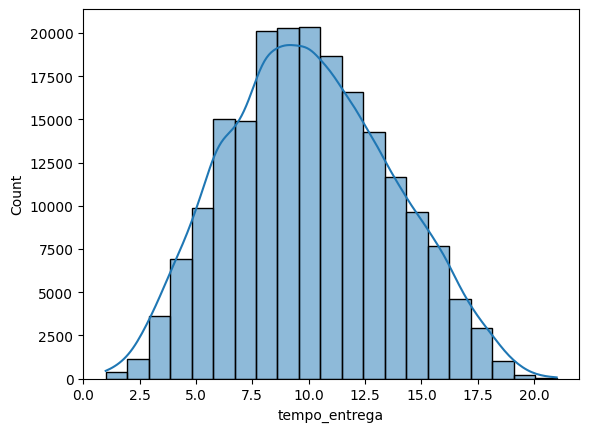

In [49]:
sns.histplot(bins=21, data=df, x='tempo_entrega', kde=True, kde_kws={'bw_adjust':2})
plt.show()

In [50]:
df.tempo_entrega.mode()[0]

10

In [51]:
tempo_entrega_resumo = {
    'media': df['tempo_entrega'].mean(),
    'mediana': df['tempo_entrega'].median(),
    'moda': df['tempo_entrega'].mode()[0]
}
tempo_entrega_resumo

{'media': 10.043535, 'mediana': 10.0, 'moda': 10}

A análise inicial revelou que o tempo de entrega segue uma **distribuição normal simétrica**.

Precisamos agora investigar se a distribuição muda para tempos de entrega com vendas com notas de satisfação 5.

Nossa hipótese é que esta distribuição sera apresentada com uma **curva assimétrica à direita**. O que pode sugerir que entregas mais rápidas podem estar relacionadas a maior satisfação do cliente.

In [52]:
dados_nota_5 = df[df['avaliacao'] == 5]
dados_nota_5.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5,Ótimo
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5,Ótimo
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5,Ótimo
5,bbbaecc2-2d97-4c02-a69c-77ccfb2c8a26,Masculino,29,Nordeste,Beleza e Cuidados Pessoais,131.20,1,131.20,13,5,Ótimo
6,923d6915-1488-485b-9398-4fbcf7146496,Masculino,44,Centro-Oeste,Casa e Mobílias,909.83,2,1819.66,14,5,Ótimo


C:\Users\jef\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


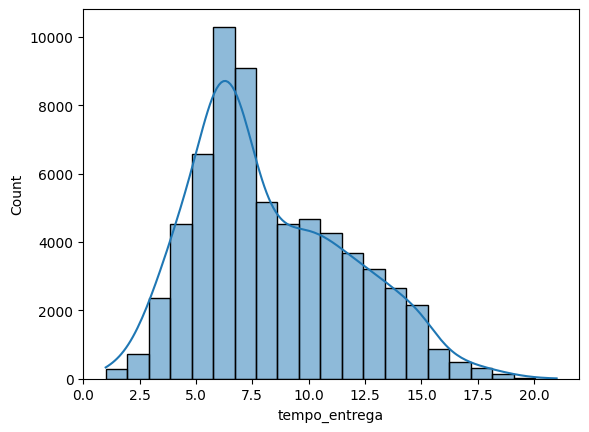

In [53]:
sns.histplot(bins=21, data=dados_nota_5, x='tempo_entrega', kde=True, kde_kws={'bw_adjust':2})
plt.show()

In [54]:
resumo = {
    'media': dados_nota_5['tempo_entrega'].mean(),
    'mediana': dados_nota_5['tempo_entrega'].median(),
    'moda': dados_nota_5['tempo_entrega'].mode()[0]
}
resumo

{'media': 8.290680428597373, 'mediana': 7.0, 'moda': 6}

Os dados confirmam que entregas mais rápidas estão associadas a avaliações nota 5, embora algumas poucas entregas mais longas ainda recebam notas altas. Esses insights destacam a importância de **manter prazos curtos de entrega para maximizar a satisfação dos clientes**.

Com essa análise, a equipe de marketing e vendas aliada à logística pode usar os resultados para:

1. Otimizar rotas e processos de entrega para reduzir o tempo de entrega médio.
2. Diferenciar campanhas promocionais com base na promessa de entregas rápidas.

# **4. Investigando os dados dos colaboradores**

---

Agora, vamos partir para análises das remunerações dos colaboradores, a pedido do setor do RH e financeiro da empresa da empresa de e-commerce.

Vamos prosseguir utilizando alguns conceitos da estatística para investigar os dados que trazem informações sobre a remuneração dos colaboradores, passando pelos salários, desempenho atual. Vamos trazer alguns insights analisando criticamente, por exemplo, a equidade salarial entre cargos e gênero e respondendo a perguntas do setor do RH e financeiro da empresa.


## **4.1 Criando o histograma de salários com amplitude fixa**

---


### <font color="#E23155" face="Verdana">Demanda 8: Iniciando as análises da remuneração dos colaboradores

</font>

A equipe de RH e financeiro da empresa de e-commerce que estamos prestando consultoria quer investigar a distribuição dos salários dos colaboradores para identificar possíveis faixas salariais e verificar a concentração de colaboradores em determinados intervalos. Essas informações serão usadas para ajustar benefícios, analisar disparidades salariais e planejar estratégias de retenção de talentos.

Nosso objetivo, é ler a base com os dados e criar uma distribuição de frequências com base em classes de salários utilizando os conceitos da estatística tanto para visualizar os dados em um histograma quanto para identificar as faixas salariais mais representativas.

### <font color="#E23155" face="Verdana">Solução:</font>

Para calcular o número de classes utilizaremos a **Regra de Sturges** para em sequência segmentar os salários em faixas e calcular a frequência absoluta e relativa de cada faixa. Por fim, construiremos um histograma para visualizar os dados.

#### **Definindo o número de classes**

##### **Regra de Sturges**

Calcula o número de classes de uma distribuição com base no tamanho da amostra:

# $$k = 1 + \frac {10}{3}\log_{10}n$$

onde,

$k$ = número de classes

$n$ = número de observações.



In [55]:
url = 'https://raw.githubusercontent.com/alura-cursos/Estatisticas-Python-frequencias-medidas/refs/heads/main/dados/colaboradores.csv'
colaboradores = pd.read_csv(url)
colaboradores.head()

,id_colaborador,nome,sexo_biologico,idade,cargo,nota_desempenho,remuneracao
0,DIR000001,Théo Sales,Masculino,45,Diretor(a),Bom,29950.79
1,DIR000002,Isis Pinto,Feminino,45,Diretor(a),Bom,27261.07
2,DIR000003,Isabelly Garcia,Feminino,45,Diretor(a),Bom,25635.61
3,DIR000004,Nina Pereira,Feminino,45,Diretor(a),Excelente,27678.60
4,DIR000005,Otávio Azevedo,Masculino,46,Diretor(a),Excelente,32084.55


In [56]:
n = len(colaboradores)
n

11090

In [57]:
import math

In [58]:
k = 1 + (10/3) * math.log10(n)
k

14.483105153830532

In [59]:
k = int(k)
k

14

In [60]:
faixas = colaboradores.copy()
faixas

,id_colaborador,nome,sexo_biologico,idade,cargo,nota_desempenho,remuneracao
0,DIR000001,Théo Sales,Masculino,45,Diretor(a),Bom,29950.79
1,DIR000002,Isis Pinto,Feminino,45,Diretor(a),Bom,27261.07
2,DIR000003,Isabelly Garcia,Feminino,45,Diretor(a),Bom,25635.61
3,DIR000004,Nina Pereira,Feminino,45,Diretor(a),Excelente,27678.60
4,DIR000005,Otávio Azevedo,Masculino,46,Diretor(a),Excelente,32084.55
...,...,...,...,...,...,...,...
11085,REP011086,Nicolas Mendes,Masculino,40,Repositor(a),Bom,3340.72
11086,REP011087,Maria Luísa Câmara,Feminino,48,Repositor(a),Insuficiente,3330.98
11087,REP011088,Allana da Mota,Feminino,28,Repositor(a),Excelente,3382.03
11088,REP011089,Bruno Rezende,Masculino,36,Repositor(a),Bom,3088.46


In [61]:
faixas['faixa_salarial'] = pd.cut(faixas['remuneracao'], bins=int(k), include_lowest=True)

faixas.head()

,id_colaborador,nome,sexo_biologico,idade,cargo,nota_desempenho,remuneracao,faixa_salarial
0,DIR000001,Théo Sales,Masculino,45,Diretor(a),Bom,29950.79,"(29929.98, 32084.55]"
1,DIR000002,Isis Pinto,Feminino,45,Diretor(a),Bom,27261.07,"(25620.84, 27775.41]"
2,DIR000003,Isabelly Garcia,Feminino,45,Diretor(a),Bom,25635.61,"(25620.84, 27775.41]"
3,DIR000004,Nina Pereira,Feminino,45,Diretor(a),Excelente,27678.60,"(25620.84, 27775.41]"
4,DIR000005,Otávio Azevedo,Masculino,46,Diretor(a),Excelente,32084.55,"(29929.98, 32084.55]"


#### **Criando a tabela de frequências**

In [62]:
tabela_frequencias = faixas.groupby('faixa_salarial',observed=False ).size().reset_index(name='frequencia')

# 2. Calculando a porcentagem
tabela_frequencias['porcentagem'] = (tabela_frequencias['frequencia'] / len(colaboradores)) * 100

tabela_frequencias

,faixa_salarial,frequencia,porcentagem
0,"(1890.405, 4075.14]",5828,52.551849
1,"(4075.14, 6229.71]",3662,33.020739
2,"(6229.71, 8384.28]",1112,10.027051
3,"(8384.28, 10538.85]",288,2.596934
4,"(10538.85, 12693.42]",131,1.181244
5,"(12693.42, 14847.99]",20,0.180343
6,"(14847.99, 17002.56]",15,0.135257
7,"(17002.56, 19157.13]",13,0.117223
8,"(19157.13, 21311.7]",11,0.099188
9,"(21311.7, 23466.27]",4,0.036069


A tabela de frequências mostra os intervalos de salários (faixas) e a concentração de colaboradores em cada uma.

* Podemos observar que mais da metade dos colaboradores (52,5%) são remunerados dentro da 1ª faixa (de R\$ 1.890,00 até R\$4.080,00).
* Proporção de Colaboradores: A coluna de porcentagem fornece insights sobre a distribuição relativa dos colaboradores, útil para comparações.

#### **Construindo o histograma**

C:\Users\jef\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


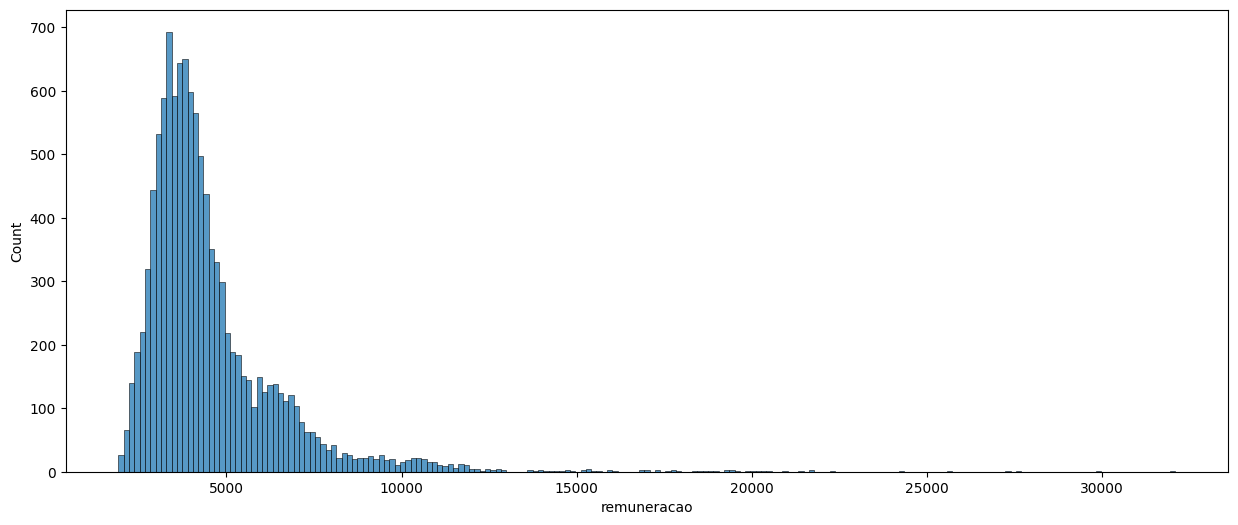

In [63]:
plt.figure(figsize=(15, 6))
sns.histplot(data=faixas, x='remuneracao')
plt.show()

C:\Users\jef\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


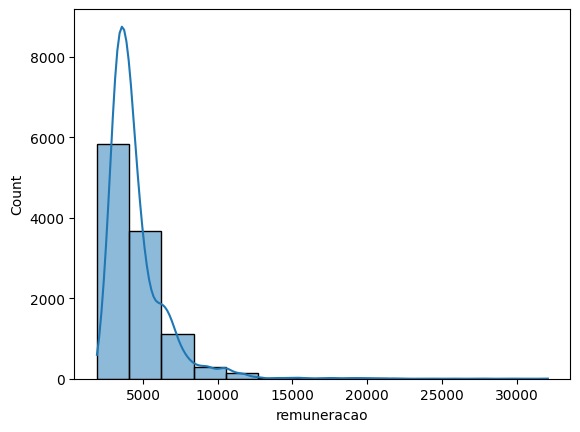

In [64]:
sns.histplot(bins=int(k), data=colaboradores, x='remuneracao', kde=True)
plt.show()

O histograma apresenta a distribuição visual da nossa tabela de frequência. Conseguimos notar um comportamento assimétrico à direita, como esperado para salários em uma empresa.
Notamos que a distribuição de salários está com mais de 95% das remunerações até R\$ 10.000,00.

## **4.2 Avaliando os salários pelas medidas separatrizes**

---



### <font color="#E23155" face="Verdana">Demanda 9: Análise de remuneração dos colaboradores</font>

Agora, a equipe de RH e financeiro da empresa quer entender melhor a distribuição dos salários dos colaboradores dentro de faixas específicas. Há um interesse em identificar faixas salariais e entender se a remuneração das pessoas coordenadoras estão dentro dos 99% maiores salários.

Como calcular e interpretar esses dados para gerar insights úteis ao RH e ao financeiro? Além disso, como comunicar essas análises de forma clara para orientar decisões estratégicas?

### **Quartis, decis e percentis**

São medidas de posição semelhantes à mediana, embora não sejam medidas de tendência central. Como se sabe, a mediana divide a distribuição em duas partes iguais quanto ao número de elementos de cada parte. Para essas 3 medidas temos:

* **Quartis:** Dividem os dados em 4 partes iguais de acordo com o número de registros, sendo bastante importante para identificar faixas.

* **Decis:** Dividem os dados em 10 partes iguais.

* **Percentis:** Dividem os dados em 100 partes iguais, que ajuda em análises mais granulares, como os 5% ou 1% maiores valores.



### <font color="#E23155" face="Verdana">Solução:</font>

Para os salários, utilizaremos os quartis para observar as faixas salariais e o percentil acima de 99% para identificar se as pessoas coordenadoras estão entre os salários mais altos.

#### **Calculando os quartis**

In [65]:
quartis = {
    'Q1': colaboradores['remuneracao'].quantile(0.25),
    'Q2': colaboradores['remuneracao'].quantile(0.50),
    'Q3': colaboradores['remuneracao'].quantile(0.75)
}

quartis


{'Q1': 3345.0775, 'Q2': 4003.3599999999997, 'Q3': 5036.1575}

#### **Visualizando os quartis em um Histograma**

C:\Users\jef\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


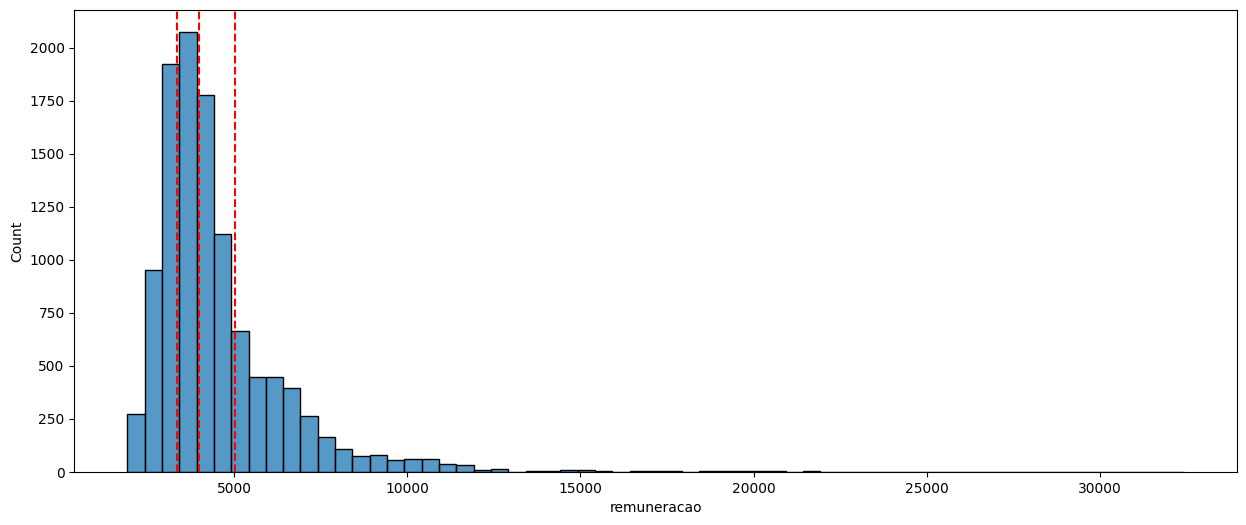

In [66]:
plt.figure(figsize=(15, 6))
sns.histplot(binwidth = 500, data=colaboradores, x='remuneracao')
plt.axvline(quartis['Q1'], color='red', linestyle='dashed')
plt.axvline(quartis['Q2'], color='red', linestyle='dashed')
plt.axvline(quartis['Q3'], color='red', linestyle='dashed')


plt.show()


Com os quartis conseguimos dividir as faixas salariais em partes iguais. Aqui conseguimos observar que por conta dos altos salários dos cargos mais gerenciais da empresa, temos uma **distribuição mais assimétrica** da remuneração.

O que é um comportamento esperado para salário: muitos recebem um valor base e poucos com altos salários.

#### **Analisando os salários das pessoas coordenadoras**

Vamos prosseguir nossa investigação verificando se as pessoas coordenadoras (3º em hierarquia na nossa base) estão entre os 1% com maiores salários.

In [67]:
percentil_99 = colaboradores['remuneracao'].quantile(0.99)
percentil_99

11525.662300000055

In [68]:
coordenadores = colaboradores[colaboradores['cargo'] == 'Coordenador(a)']

num_coordenadores = len(coordenadores)

num_coordenadores

45

In [69]:
coordenadores_alta_remuneracao = colaboradores[(colaboradores['cargo'] == 'Coordenador(a)') & (colaboradores['remuneracao'] > percentil_99)]

num_coordenadores_alta_remuneracao = len(coordenadores_alta_remuneracao)

num_coordenadores_alta_remuneracao

45

Com isso, conseguimos comprovar que as pessoas coordenadoras estão entre os 1% que recebem maiores salários dentro da empresa. Podemos repassar essa informação para o RH e financeiro da empresa para averiguar se está dentro das políticas salariais. E, se possível, analisando mais perfis, eles poderão definir políticas de remuneração mais transparentes e alinhadas ao mercado.

## **4.3 Classificando dados pelas medidas separatrizes**

---

### <font color="#E23155" face="Verdana">Demanda 10: Pesquisa de colaboradores mais jovens</font>

Nesta nova demanda, a equipe de RH da empresa quer realizar uma pesquisa em torno das idades dos colaboradores. Isto porque a empresa deseja identificar o grupo mais jovem (**20% mais novos**) para implementar um programa de aceleração profissional com cursos e treinamentos voltados ao desenvolvimento de jovens talentos.

Como calcular e interpretar esses dados para repassar ao RH?

### <font color="#E23155" face="Verdana">Solução - Analisando as idades:</font>

Para as idades, visualizaremos a distribuição, classificaremos as idades percentualmente, e determinaremos o ponto de corte para o grupo de 20% mais jovens, que poderão ser contemplados com o programa de aceleração profissional.


#### **Visualizando a faixa etária desejada**

C:\Users\jef\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


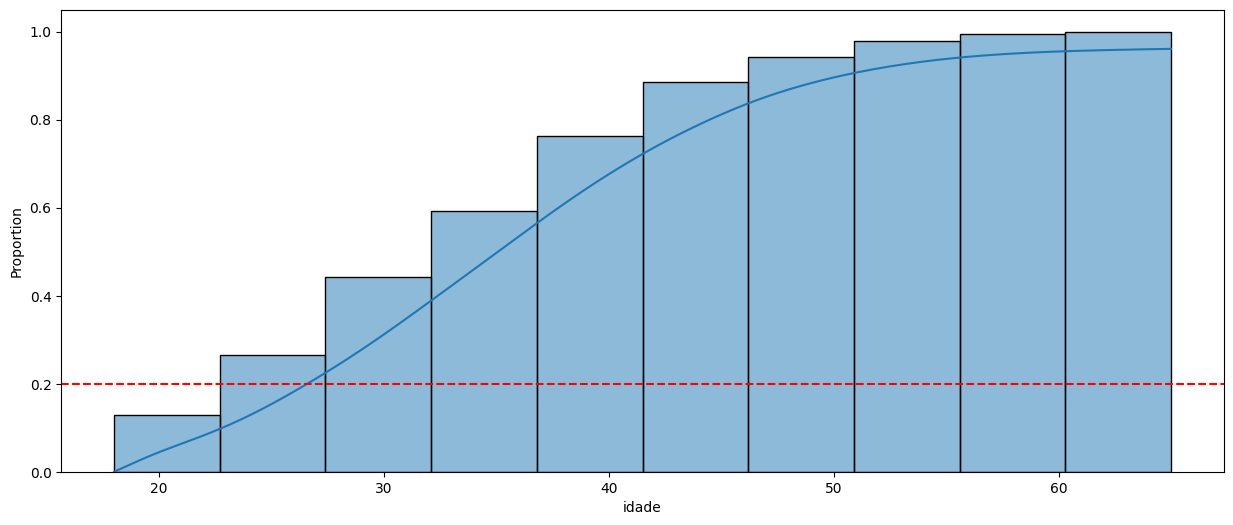

In [70]:
plt.figure(figsize=(15, 6))
sns.histplot(data=colaboradores, x='idade', bins= 10, cumulative=True, stat='proportion', kde=True )
plt.axhline(0.20, color='red', linestyle='dashed')


plt.show()

#### **Classificando os colaboradores e identificando público**

In [71]:
idades_classificacao = colaboradores.copy()
idades_classificacao.head()

,id_colaborador,nome,sexo_biologico,idade,cargo,nota_desempenho,remuneracao
0,DIR000001,Théo Sales,Masculino,45,Diretor(a),Bom,29950.79
1,DIR000002,Isis Pinto,Feminino,45,Diretor(a),Bom,27261.07
2,DIR000003,Isabelly Garcia,Feminino,45,Diretor(a),Bom,25635.61
3,DIR000004,Nina Pereira,Feminino,45,Diretor(a),Excelente,27678.60
4,DIR000005,Otávio Azevedo,Masculino,46,Diretor(a),Excelente,32084.55


In [72]:
# 1. Ordenar os dados pela coluna 'idade'
idades_classificacao = idades_classificacao.sort_values(by='idade')

# 2. Adicionar a coluna 'cumulativo' (posição relativa de cada linha)
idades_classificacao['cumulativo'] = (idades_classificacao.reset_index().index + 1) / len(idades_classificacao)

# 3. Adicionar a coluna 'qualificado' com base no valor de 'cumulativo'
idades_classificacao['qualificado'] = idades_classificacao['cumulativo'] <= 0.20

idades_classificacao

,id_colaborador,nome,sexo_biologico,idade,cargo,nota_desempenho,remuneracao,cumulativo,qualificado
5544,EST005545,Ester Duarte,Feminino,18,Estoquista,Insuficiente,2580.59,0.000090,True
1550,SUP001551,Brenda da Mota,Feminino,18,Suporte,Bom,4537.59,0.000180,True
10649,REP010650,Ana Julia Sousa,Feminino,18,Repositor(a),Regular,3084.11,0.000271,True
6285,EST006286,Giovanna Nogueira,Feminino,18,Estoquista,Excelente,2630.97,0.000361,True
10652,REP010653,Brenda Montenegro,Feminino,18,Repositor(a),Bom,3864.84,0.000451,True
...,...,...,...,...,...,...,...,...,...
4460,EST004461,Felipe Almeida,Masculino,65,Estoquista,Excelente,4905.33,0.999639,False
5200,EST005201,Antônio Dias,Masculino,65,Estoquista,Excelente,5264.99,0.999729,False
10744,REP010745,Vinícius da Rocha,Masculino,65,Repositor(a),Bom,4519.99,0.999820,False
4167,EST004168,Théo Carvalho,Masculino,65,Estoquista,Excelente,5670.72,0.999910,False


In [73]:
idades_qualificados = idades_classificacao[idades_classificacao['qualificado'] == True]
idades_qualificados

,id_colaborador,nome,sexo_biologico,idade,cargo,nota_desempenho,remuneracao,cumulativo,qualificado
5544,EST005545,Ester Duarte,Feminino,18,Estoquista,Insuficiente,2580.59,0.000090,True
1550,SUP001551,Brenda da Mota,Feminino,18,Suporte,Bom,4537.59,0.000180,True
10649,REP010650,Ana Julia Sousa,Feminino,18,Repositor(a),Regular,3084.11,0.000271,True
6285,EST006286,Giovanna Nogueira,Feminino,18,Estoquista,Excelente,2630.97,0.000361,True
10652,REP010653,Brenda Montenegro,Feminino,18,Repositor(a),Bom,3864.84,0.000451,True
...,...,...,...,...,...,...,...,...,...
1943,SUP001944,Maria Sophia Gomes,Feminino,25,Suporte,Bom,6478.48,0.199639,True
325,INT000326,Maria Flor Peixoto,Feminino,25,Inteligência comercial,Bom,8897.67,0.199729,True
176,CON000177,Maria Helena Correia,Feminino,25,Consultor(a) de vendas,Regular,9585.12,0.199820,True
2678,SUP002679,Diego Fonseca,Masculino,25,Suporte,Bom,6446.15,0.199910,True


In [74]:
len(idades_qualificados)

2218

Com base na análise, identificamos que há **2.218 pessoas** qualificadas para o programa, representando os **20% mais jovens do total de colaboradores**. Esse grupo pode ser o alvo ideal para o programa de aceleração profissional, já que engloba aqueles que estão no início de suas carreiras.

Agora, podemos reportar ao RH a lista de funcionários dentro da qualificação desejada, o que ajudará no planejamento do programa para jovens talentos, fortalecendo a cultura organizacional e promovendo o desenvolvimento profissional.

## **4.4 Construindo um boxplot para visualização das distribuições**

---



### <font color="#E23155" face="Verdana">Demanda 11: Análise de remuneração dos colaboradores pelo sexo</font>

A equipe de RH e financeiro da empresa requisitou uma nova análise das distribuições salariais. Ela tem interesse em investigar as diferenças salariais entre os sexos biológicos masculino e feminino, buscando informações para reforçar a importância de garantir a equidade salarial.

Os dados salariais não são fáceis de interpretar em tabelas ou gráficos convencionais. É necessário um visual que permita identificar algumas medidas de tendência central , faixas de salário e até possíveis outliers, além de comparar visualmente as distribuições entre diferentes grupos.

Com isso, o RH também pode direcionar ações voltadas à igualdade salarial.

### **Boxplot**

![texto do link](https://github.com/afonsosr2/estatistica-r-frequencias-medidas/blob/main/imagens/outros/boxplot.png?raw=true)

O **boxplot** é uma representação visual que mostra a distribuição de dados quantitativos, facilitando comparações entre variáveis ou categorias.

Os elementos principais de um boxplot são:

* **Caixa:** Representa o intervalo
interquartil (IIQ), que vai do primeiro quartil (Q1 - 25% dos dados) ao terceiro quartil (Q3 - 75% dos dados).

* **Linha mediana:** Onde está posicionado a mediana (Q2), valor que separa 50% dos dados.

* **Whiskers ("bigodes"):** Extensões que mostram a variabilidade fora do intervalo interquartil, geralmente até 1,5 vezes o IIQ a partir dos quartis.

* **Outliers:** Pontos individuais que estão fora do alcance dos *whiskers*, indicados separadamente.

Essa visualização ajuda a identificar a centralidade, dispersão e possíveis outliers em um conjunto de dados.



### <font color="#E23155" face="Verdana">Solução:</font>

Vamos construir e interpretar boxplots para visualizar a distribuição das variáveis. Analisaremos diferenças salariais entre os sexos e discutiremos possíveis ações para promover equidade.

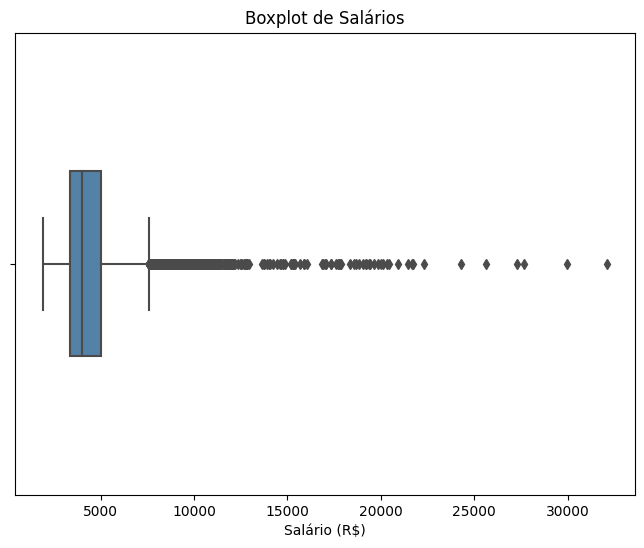

In [75]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=colaboradores['remuneracao'], color='steelblue')

plt.title('Boxplot de Salários')
plt.xlabel('Salário (R$)')

plt.ylim(-1, 1)

plt.show()

Para sabermos os valores de cada elemento do boxplot, podemos utilizar as funções quando estudamos os quartis das remunerações ou chamar a função `describe()` que resume nossos dados com as principais estatísticas descritivas.

In [76]:
colaboradores['remuneracao'].describe()

count    11090.000000
mean      4531.771665
std       2002.369876
min       1920.570000
25%       3345.077500
50%       4003.360000
75%       5036.157500
max      32084.550000
Name: remuneracao, dtype: float64

Agora, vamos partir para o foco da nossa análise que é a comparação entre os sexos biológicos:

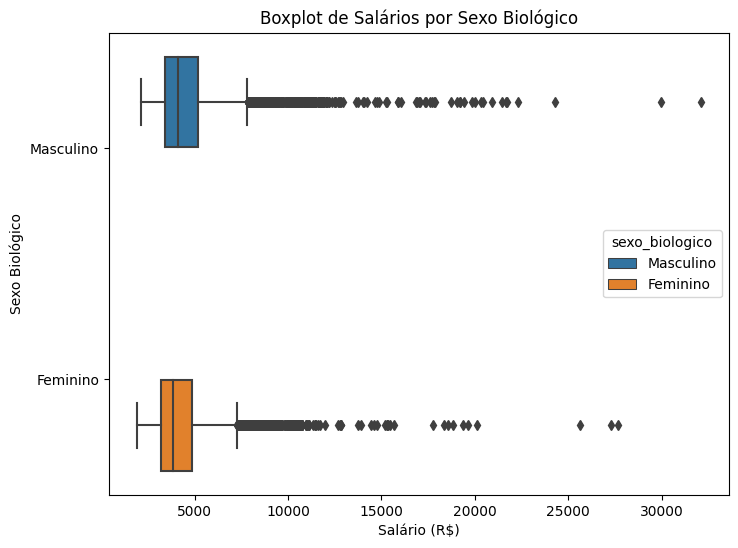

In [77]:
# Criando o boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='remuneracao', y='sexo_biologico', data=colaboradores, hue='sexo_biologico')

# Adicionando título e rótulos aos eixos
plt.title('Boxplot de Salários por Sexo Biológico')
plt.xlabel('Salário (R$)')
plt.ylabel('Sexo Biológico')


plt.show()

Aplicando a análise visual, conseguimos notar que aparentemente as pessoas do sexo masculino possuem uma distribuição salarial maior que a do sexo feminino, mas com os candidatos à outliers que temos ainda não fica tão clara essa diferença.

> **Obs:** Outliers indicam indivíduos com salários significativamente maiores ou menores.

Como estudamos anteriormente, mais de 95% das remunerações chegam até R$ 10.000,00. Podemos usar esse fator para filtrar os dados e observar com mais facilidade essa diferença salarial.

In [78]:
colaboradores_filtrados = colaboradores[colaboradores['remuneracao'] <= 10e3]
colaboradores_filtrados.head()

,id_colaborador,nome,sexo_biologico,idade,cargo,nota_desempenho,remuneracao
65,CON000066,Antony da Paz,Masculino,40,Consultor(a) de vendas,Regular,9317.13
66,CON000067,Luiz Felipe Sales,Masculino,38,Consultor(a) de vendas,Regular,9423.72
67,CON000068,Sophia Mendonça,Feminino,37,Consultor(a) de vendas,Regular,9409.15
68,CON000069,Rael Leão,Masculino,40,Consultor(a) de vendas,Bom,9315.77
70,CON000071,Stephany Sales,Feminino,27,Consultor(a) de vendas,Bom,9060.64


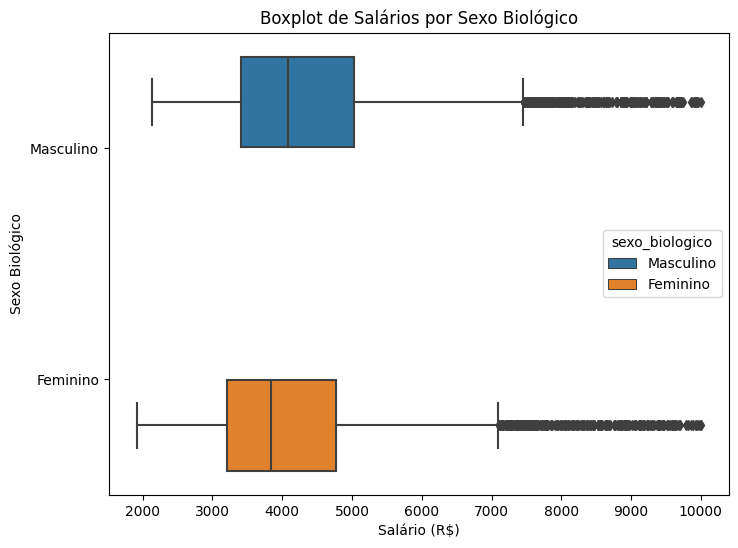

In [79]:
# Criando o boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='remuneracao', y='sexo_biologico', data=colaboradores_filtrados, hue='sexo_biologico')

# Adicionando título e rótulos aos eixos
plt.title('Boxplot de Salários por Sexo Biológico')
plt.xlabel('Salário (R$)')
plt.ylabel('Sexo Biológico')

plt.show()

Notamos aqui que **a mediana dos salários para pessoas do sexo feminino é menor** que a das pessoas com sexo masculino, sendo o primeiro abaixo **R$ 4.000,00** e o segundo acima desse valor.

Para reforçar a análise, vamos calcular as estatísticas descritivas para cada grupo.

In [80]:
estat_remuneracao = colaboradores.groupby('sexo_biologico')['remuneracao'].agg(
    Q1 = lambda x: x.quantile(0.25),
    mediana = 'median',
    media = 'mean',
    Q3 = lambda x: x.quantile(0.75),
    IIQ = lambda x: x.quantile(0.75) - x.quantile(0.25)
).reset_index()
estat_remuneracao

,sexo_biologico,Q1,mediana,media,Q3,IIQ
0,Feminino,3219.585,3858.82,4352.968368,4843.315,1623.730
1,Masculino,3427.525,4121.19,4673.053688,5189.190,1761.665


Podemos reportar os resultados para o RH da empresa que deve investigar as causas, especialmente ao considerar cargos similares. Com isso, será possível que a equipe realize ações que busquem revisar políticas salariais para garantir igualdade e realizar análises adicionais considerando fatores como cargo, experiência e desempenho.

# **5. Analisando as variações dos dados**

---

## **5.1 Calculando o desvio médio absoluto**

---


### <font color="#E23155" face="Verdana">Demanda 12: Analisando diferenças salariais - Parte 1</font>

A equipe de RH e financeiro da empresa de e-commerce recebeu alguns feedbacks sobre uma possível falta de padrão entre os salários dos cargos de **Inteligência comercial** e **Consultor(a) de vendas**.

Com que aprendemos até o momento, apenas as medidas de tendência central (média e mediana) não são suficientes para avaliar a uniformidade dos salários. É necessário um indicador de dispersão que mostre como os salários se distribuem em relação à média, revelando inconsistências.

O objetivo é investigar as faixas salariais desses cargos.





#### **Medidas de dispersão**
As **medidas de dispersão** são utilizadas para indicar o grau da variação dos valores de uma variável quantitativa em relação à sua média.

Embora as medidas de tendência central e de posição forneçam uma sumarização bastante importante dos dados, elas podem não ser suficientes para caracterizar conjuntos distintos, especialmente quando as observações de determinada distribuição apresentarem dados muito dispersos.

#### **Desvio médio absoluto (MAD)**
O **Desvio Médio Absoluto (MAD)** é uma medida para avaliar a dispersão dos dados que representa a média das diferenças absolutas entre cada valor e a média dos dados.

# $$MAD = \frac 1n\sum_{i=1}^{n}|X_i-\bar{X}|$$

Onde:

$n$ = número de observações

$X_i$ = valores da i-ésima variável

$\bar{X}$ = a média da distribuição


### <font color="#E23155" face="Verdana">Solução:</font>

#### **Ler as estatísticas descritivas das remunerações**

Vamos começar lendo os valores de tendência central dos salários dos cargos de Inteligência comercial e Consultor(a) de vendas

In [81]:
comercial = colaboradores[colaboradores['cargo'].isin(['Inteligência comercial', 'Consultor(a) de vendas'])]
comercial

,id_colaborador,nome,sexo_biologico,idade,cargo,nota_desempenho,remuneracao
65,CON000066,Antony da Paz,Masculino,40,Consultor(a) de vendas,Regular,9317.13
66,CON000067,Luiz Felipe Sales,Masculino,38,Consultor(a) de vendas,Regular,9423.72
67,CON000068,Sophia Mendonça,Feminino,37,Consultor(a) de vendas,Regular,9409.15
68,CON000069,Rael Leão,Masculino,40,Consultor(a) de vendas,Bom,9315.77
69,CON000070,Helena Cavalcante,Feminino,31,Consultor(a) de vendas,Bom,10223.20
...,...,...,...,...,...,...,...
420,INT000421,Bruna Rocha,Feminino,25,Inteligência comercial,Insuficiente,9394.34
421,INT000422,Sabrina Fonseca,Feminino,25,Inteligência comercial,Insuficiente,8818.74
422,INT000423,Lucas Freitas,Masculino,40,Inteligência comercial,Insuficiente,9304.39
423,INT000424,Samuel Brito,Masculino,40,Inteligência comercial,Regular,10345.32


In [82]:
comercial.groupby('cargo')['remuneracao'].describe()[['mean', '50%']]

,mean,50%
cargo,,
Consultor(a) de vendas,10180.454833,10213.43
Inteligência comercial,10200.420000,10217.49


Conseguimos notar que as médias e medianas estão bem próximas, então parece tudo ok, certo?

**Não!** As medidas de tendência central servem para trazer um valor que generaliza nosso dado, mas que não representa a dispersão entre eles. Neste caso precisamos utilizar as medidas de dispersão para ter uma noção.

#### **Observando as variações das remunerações**

In [83]:
import numpy as np
np.random.seed(42)

amostra = comercial.sample(n=10)
amostra


,id_colaborador,nome,sexo_biologico,idade,cargo,nota_desempenho,remuneracao
289,INT000290,Lorena Pinto,Feminino,34,Inteligência comercial,Bom,8427.85
107,CON000108,Olivia Castro,Feminino,25,Consultor(a) de vendas,Bom,10578.73
350,INT000351,Renan Moura,Masculino,25,Inteligência comercial,Excelente,10406.36
367,INT000368,Gabrielly Aparecida,Feminino,27,Inteligência comercial,Excelente,10454.42
121,CON000122,Melissa Pastor,Feminino,25,Consultor(a) de vendas,Bom,10046.53
337,INT000338,Emilly Silva,Feminino,33,Inteligência comercial,Bom,8861.07
80,CON000081,Catarina Porto,Feminino,25,Consultor(a) de vendas,Regular,8646.19
122,CON000123,Antony Ferreira,Masculino,37,Consultor(a) de vendas,Bom,10001.79
313,INT000314,Alexia da Cruz,Feminino,42,Inteligência comercial,Regular,10557.85
189,CON000190,Benicio Machado,Masculino,37,Consultor(a) de vendas,Bom,11354.96


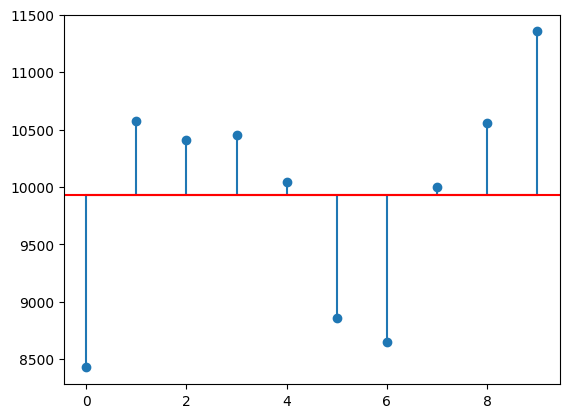

In [84]:
plt.stem(amostra['remuneracao'], bottom=amostra['remuneracao'].mean())
plt.axhline(y = amostra['remuneracao'].mean(), color='red')


plt.show()

In [85]:
estat_colab = comercial.groupby('cargo')['remuneracao'].agg(
    media='mean',
    mediana='median',
    mad=lambda x: (abs(x - x.mean())).mean()
).reset_index()


estat_colab

,cargo,media,mediana,mad
0,Consultor(a) de vendas,10180.454833,10213.43,843.398335
1,Inteligência comercial,10200.420000,10217.49,929.853000


Como dito anteriormente a média e mediana estão próximas entre os dois cargos. E o desvio médio absoluto é ligeiramente maior para as pessoas consultoras,  indicando maior dispersão se comparada com as pessoas da Inteligência comercial. Podemos visualizar graficamente essa variação entre elas.

#### **Visualizando graficamente**

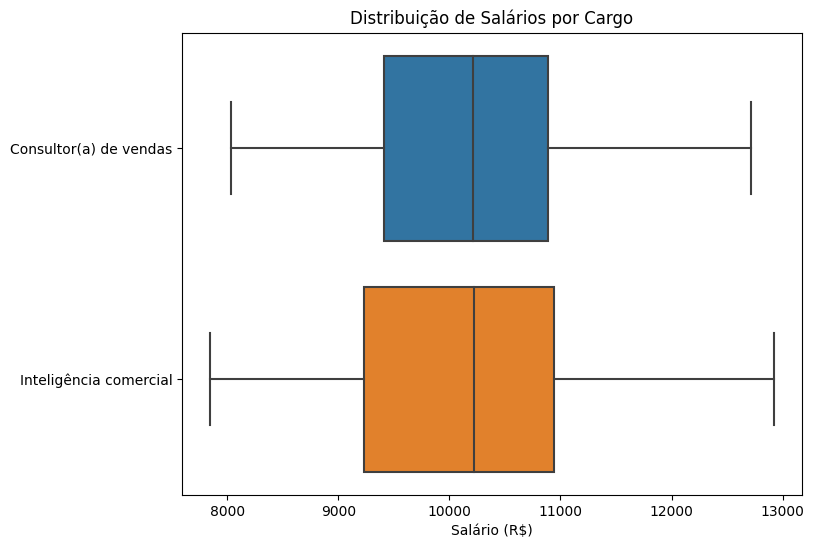

In [86]:
plt.figure(figsize=(8, 6))  # Definindo o tamanho do gráfico
sns.boxplot(x='remuneracao', y='cargo', data=comercial)


# Adicionando título e rótulos aos eixos
plt.title('Distribuição de Salários por Cargo')
plt.xlabel('Salário (R$)')
plt.ylabel('')


plt.show()

Conseguimos observar os comportamentos dos salários entre os profissionais de inteligência comercial e consultoria de vendas e percebemos que ambos têm média e mediana salariais muito próximas, com uma variação ligeiramente superior do cargo de inteligência comercial, que foi comprovado tanto pelo MAD quanto observando o intervalo interquartil (IIQ).

A equipe de RH pode usar esses dados para:

* Investigar os critérios de definição salarial para ambos, visto que o esperado era ter o mesmo nível salarial.
* Estabelecer políticas salariais mais padronizadas para cargos equivalentes ou ser mais transparente na definição salarial dentro da empresa.

## **5.2 Calculando a variância e desvio padrão**

---


### <font color="#E23155" face="Verdana">Demanda 12: Analisando diferenças salariais - Parte 2</font>

A equipe de RH e financeiro da empresa de e-commerce também recebeu alguns feedbacks sobre uma possível falta de padrão entre os salários de dois cargos operacionais, Estoquista e Repositor(a), que representam o maior volume de funcionários da empresa.

O objetivo é investigar também as faixas salariais desses cargos, determinar qual deles apresenta maior inconsistência e identificar padrões que possam sugerir desigualdades ou problemas de política salarial.

#### **Variância ($\sigma^2$ ou $S^2$)**
A **variância** é uma medida de dispersão que mostra o quão distante cada valor de uma variável quantitativa está da média da sua distribuição.

Ela é construída a partir das diferenças entre cada observação e a média dos dados, ou seja, o desvio em torno da média. No cálculo da variância, os desvios em torno da média são elevados ao quadrado.

##### **Variância populacional**

# $$\sigma^2 = \frac 1n\sum_{i=1}^{n}(X_i-\mu)^2$$

##### **Variância amostral**

# $$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

Onde:

$n$ = número de observações

$X_i$ = valores da i-ésima variável

$\mu$ e $\bar{X}$ = média da população e amostra da distribuição, respectivamente


### <font color="#E23155" face="Verdana">Solução:</font>

#### **Ler as estatísticas descritivas das remunerações**

Vamos começar lendo os valores de tendência central dos salários dos cargos de Estoquista e Repositor(a)

In [87]:
operacional = colaboradores[colaboradores['cargo'].isin(['Estoquista', 'Repositor(a)'])]
operacional

,id_colaborador,nome,sexo_biologico,idade,cargo,nota_desempenho,remuneracao
2990,EST002991,Fernando da Luz,Masculino,34,Estoquista,Excelente,4547.65
2991,EST002992,Maria Júlia das Neves,Feminino,50,Estoquista,Insuficiente,2558.19
2992,EST002993,Evelyn Vasconcelos,Feminino,18,Estoquista,Insuficiente,2956.15
2993,EST002994,Igor Brito,Masculino,38,Estoquista,Regular,3431.13
2994,EST002995,João Vitor da Paz,Masculino,37,Estoquista,Excelente,3031.93
...,...,...,...,...,...,...,...
11085,REP011086,Nicolas Mendes,Masculino,40,Repositor(a),Bom,3340.72
11086,REP011087,Maria Luísa Câmara,Feminino,48,Repositor(a),Insuficiente,3330.98
11087,REP011088,Allana da Mota,Feminino,28,Repositor(a),Excelente,3382.03
11088,REP011089,Bruno Rezende,Masculino,36,Repositor(a),Bom,3088.46


In [88]:
operacional.groupby('cargo')['remuneracao'].describe()[['mean', '50%']]

,mean,50%
cargo,,
Estoquista,3691.291726,3663.560
Repositor(a),3646.120496,3633.075


Conseguimos notar que novamente as médias e medianas estão bem próximas. Precisamos utilizar as medidas de dispersão para ter uma noção se realmente temos uma diferença relevantes entre os salários dos dois cargos.

In [89]:
estatisticas_operacional = operacional.groupby('cargo')['remuneracao'].agg(
    media='mean',
    mediana='median',
    variancia='var'
).reset_index()

estatisticas_operacional

,cargo,media,mediana,variancia
0,Estoquista,3691.291726,3663.560,786009.782487
1,Repositor(a),3646.120496,3633.075,228556.384730


Números bem altos não é mesmo? O que isso significa?

Como variância fornece os valores das medidas ao quadrado, representar o nosso resultado dessa forma dificultaria a comparação da dispersão com as variáveis que a definem.

Um modo de eliminar essa dificuldade é utilizando o **desvio padrão**

#### **Desvio padrão ($\sigma$ ou $S$)**

O desvio padrão é uma medida de dispersão que indica o grau de dispersão de um conjunto de dados. É expresso pela raiz quadrada da variância populacional ou amostral.

Além de expressar a variabilidade da população, o desvio padrão pode ser utilizado para medir a confiança (nível de acerto esperado de uma estimativa) e geralmente permite sintetizar os resultados de amostras.


##### **Desvio padão populacional**

# $$\sigma = \sqrt{\frac 1n\sum_{i=1}^{n}(X_i-\mu)^2} \Longrightarrow \sigma = \sqrt{\sigma^2}$$

##### **Desvio padrão amostral**

# $$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$

Onde:

$n$ = número de observações

$X_i$ = valores da i-ésima variável

$\mu$ e $\bar{X}$ = média da população e amostra da distribuição, respectivamente


In [90]:
estatisticas_operacional = operacional.groupby('cargo')['remuneracao'].agg(
    media='mean',
    mediana='median',
    variancia='var',
    desvio_padrao='std',
    mad=lambda x: (abs(x - x.mean())).mean()
).reset_index()

estatisticas_operacional

,cargo,media,mediana,variancia,desvio_padrao,mad
0,Estoquista,3691.291726,3663.560,786009.782487,886.571927,754.656332
1,Repositor(a),3646.120496,3633.075,228556.384730,478.075710,399.522975


O que podemos constatar aqui:
1. **Média e Mediana:** Ambos os cargos têm valores próximos, indicando simetria na centralidade.

2. **Variância e Desvio Padrão:** O cargo de Estoquista tem maior variância e desvio padrão, revelando maior dispersão nos salários.

3. **MAD vs. Desvio Padrão:** Em ambos os casos o MAD é menor em relação ao desvio padrão, indicando que a dispersão está sendo influenciada por valores extremos.


#### **Visualizando graficamente**

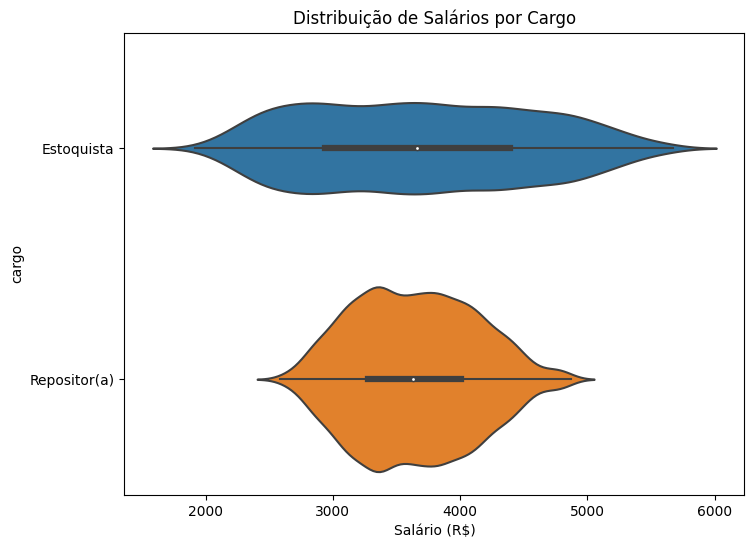

In [91]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='remuneracao', y='cargo', data=operacional)

plt.title('Distribuição de Salários por Cargo')
plt.xlabel('Salário (R$)')


plt.show()

Conseguimos observar os comportamentos dos salários entre os profissionais estoquistas e repositores e percebemos que ambos têm média e mediana salariais muito próximas, entretando notamos uma dispersão considerável entre os salários dos colaboradores, que foi comprovado tanto pelo desvio padrão e MAD quanto observando o intervalo interquartil (IIQ) no gráfico de violino.

Consideração para o RH:

* As métricas indicam que o cargo de Estoquista possui maior variabilidade salarial.
* O RH deve investigar se essa inconsistência reflete discrepâncias injustas ou se há justificativas baseadas em mérito ou experiência.

Como sugestão:
* Ajuste das políticas para reduzir a inconsistência salarial, promovendo equidade.
* Compartilhamento de mais informações para análise de outras métricas para maior robustez na análise.